# ANN - Regresi贸n Caso Ecommerce

In [2]:
import pandas as pd
import numpy as np

## Lectura de Datos

In [3]:
df = pd.read_csv('Ecommerce.csv')

In [5]:
df.head(2)

Email                                         Address  \
0  mstephenson@fernandez.com    835 Frank Tunnel\nWrightmouth, MI 82180-9605   
1          hduke@hotmail.com  4547 Archer Common\nDiazchester, CA 06566-8576   

      Avatar  Avg. Session Length  Time on App  Time on Website  \
0     Violet            34.497268    12.655651        39.577668   
1  DarkGreen            31.926272    11.109461        37.268959   

   Length of Membership  Yearly Amount Spent  
0              4.082621           587.951054  
1              2.664034           392.204933

## Limpieza de Datos

In [6]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Planteamiento del modelo

In [7]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

## Preprocesamiento

Haremos lo siguiente:

*   Escalamiento



### Escalamiento

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_enc = scaler.fit_transform(X)

In [10]:
X_enc[:2]

array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735]])

### Validacion Cruzada

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Arquitectura de la red neuronal

La arquitectura es un arte. En este caso, utilizaremos capas densas (fully connected)

*  Probar con activation: relu, tanh, linear
*  Probar optimizadores: Adam, SGD, RMSProp, Adagrad
*  Probar combinaciones de capas

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

In [18]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(20, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(1, activation='linear'))

In [53]:
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.01),
              metrics=[r2])

In [48]:
from keras import backend as K

In [50]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

### Visualizaci贸n del modelo

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


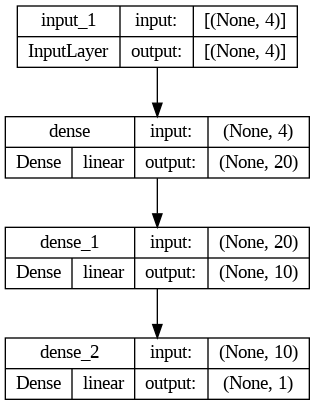

In [43]:
plot_model(model, show_shapes=True, show_layer_activations=True)

### Entrenamiento

In [54]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
3/3 [==============================] - 1s 108ms/step - loss: 3542.3950 - r2: 0.5784 - val_loss: 1377.6489 - val_r2: 0.7491
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 3011.4092 - r2: 0.5394 - val_loss: 1633.5139 - val_r2: 0.7026
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 1253.5922 - r2: 0.8227 - val_loss: 2204.4077 - val_r2: 0.5986
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 2165.7126 - r2: 0.6968 - val_loss: 1247.9825 - val_r2: 0.7728
Epoch 5/50
3/3 [==============================] - 0s 26ms/step - loss: 836.8348 - r2: 0.8903 - val_loss: 997.6479 - val_r2: 0.8183
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 1364.5104 - r2: 0.8092 - val_loss: 820.2029 - val_r2: 0.8507
Epoch 7/50
3/3 [==============================] - 0s 21ms/step - loss: 835.2279 - r2: 0.8816 - val_loss: 895.4652 - val_r2: 0.8369
Epoch 8/50
3/3 [==============================] - 0s 29ms/step - loss: 92

## Evaluaci贸n

In [28]:
from sklearn.metrics import r2_score

In [55]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [56]:
r2_score(y_test,y_pred)

0.9087738087893834

## Evoluci贸n del entrenamiento

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

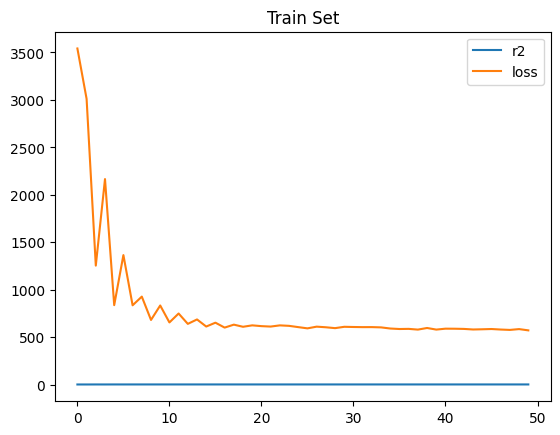

In [59]:
plt.title('Train Set')
plt.plot(history.history['r2'], label='r2')
plt.plot(history.history['loss'], label='loss')
plt.legend(loc=0)

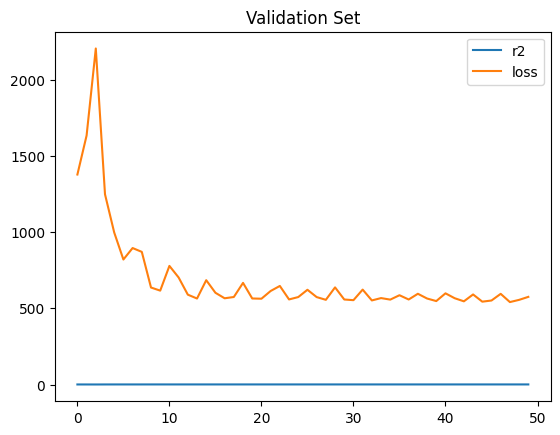

In [60]:
plt.title('Validation Set')
plt.plot(history.history['val_r2'], label='r2')
plt.plot(history.history['val_loss'], label='loss')
plt.legend(loc=0)